<a href="https://colab.research.google.com/github/Nafise-Dev/DA_taux_suicides/blob/main/Taux_suicides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Quelles sont les caractéristiques qui ramènent à un taux de suicide élevé ?

In [2]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Taux suicides_DA/master.csv')
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [4]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [5]:
#renommer les colonnes
df.rename(columns={"suicides/100k pop":"suicides_pop"," gdp_per_capita ($) ":"gdp_per_capita","gdp_per_capita ($)":"gdp_per_capita","gdp_for_year ($)":"gdp_for_year", " gdp_for_year ($) ":"gdp_for_year","HDI for year":"hdi_for_year"}, inplace=True)
#enlève les virgules pour les nombres
df["gdp_for_year"] = df["gdp_for_year"].astype(str).str.replace(",","")
df

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,hdi_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


Je compare le taux de suicides avec le sexe masculin et féminin.

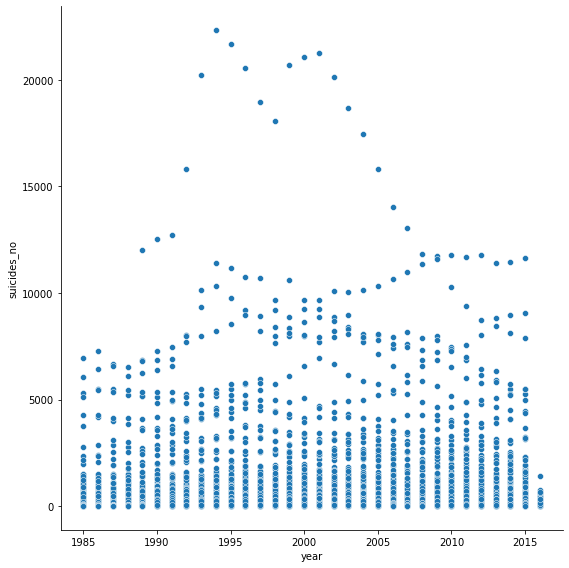

In [32]:
df_men = df[df["sex"] == "male"]
sb.relplot(x=df_men.year, y="suicides_no", data=df, height=8)

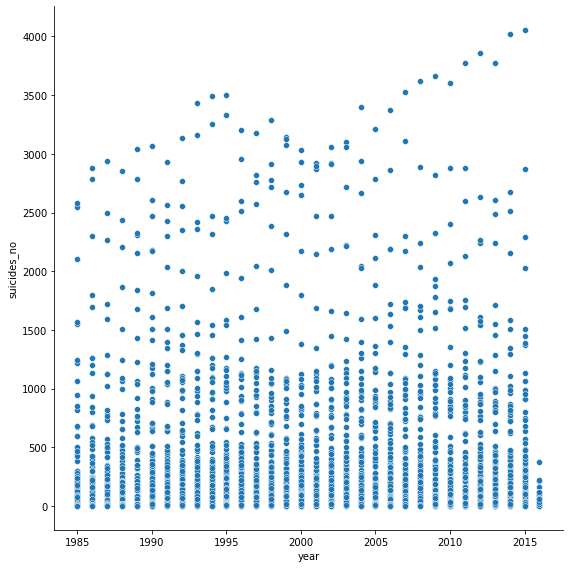

In [33]:
df_women = df[df["sex"] == "female"]
sb.relplot(x=df_women.year, y="suicides_no", data=df, height=8)

Je constate que le taux de suicides pour les personnes de sexe masuclin est élevé par rapport aux personnes de sexe opposés. La corrélation n'est pas bonne.

Je vais donc comparer l'âge avec le sexe masculin et féminin.

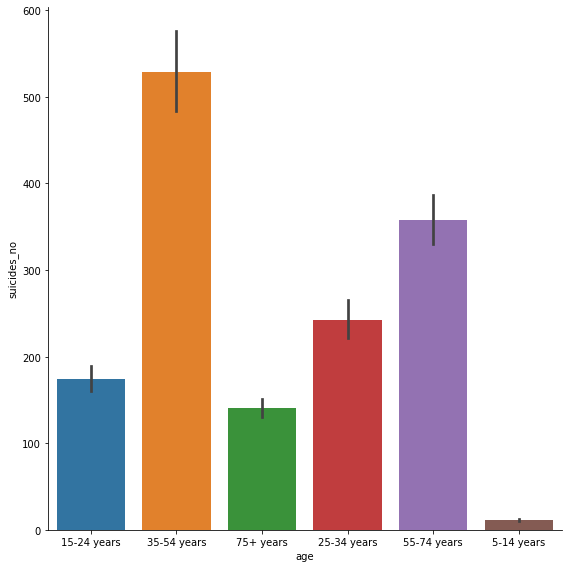

In [36]:
sb.catplot(x="age", y="suicides_no", data=df, kind="bar", height=8)


L'âge n'est pas un des facteurs qui a une influence sur le taux de suicides. 

La condition de vie dans chaque pays pourrait également influencer le taux de suicides.


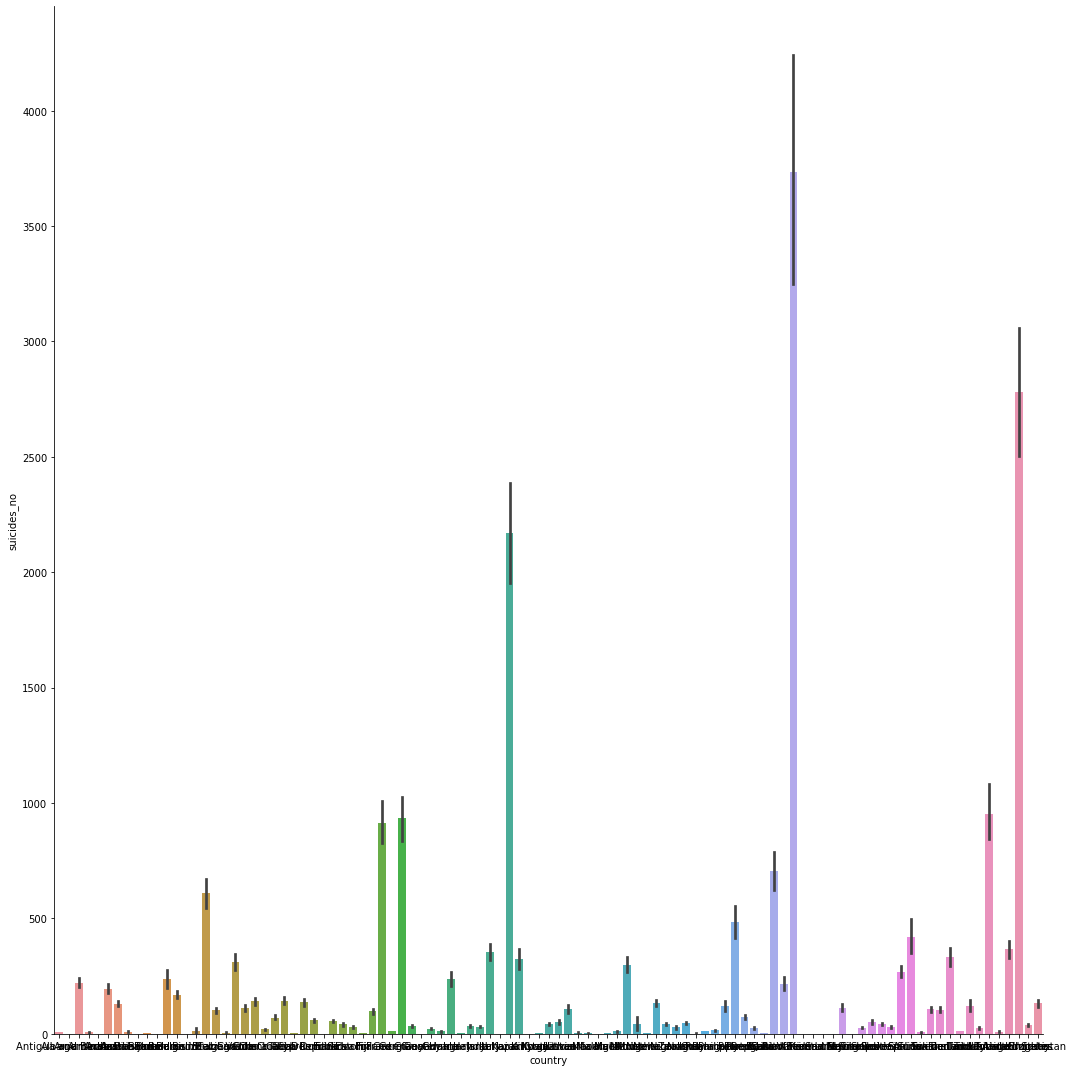

In [6]:
sb.catplot(x="country", y="suicides_no", data = df, kind="bar",height=15)


L'écart-type est important donc non fiables pour la Russie et les Etats-unis

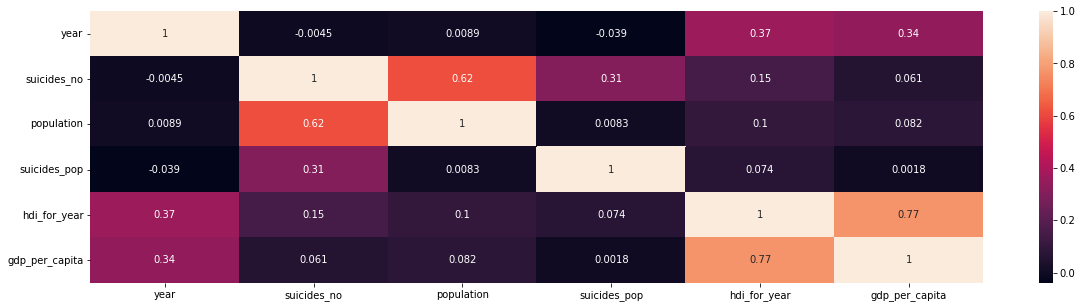

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20,5))
sb.heatmap(corr, annot=True, ax =ax)
plt.savefig('heatmapEX1.png')

La corrélation est de 0.62 entre les caractéristiques "suicides_no" et "population". Ceci me permet de déduire que se sont des facteurs qui influencent le taux de suicides.



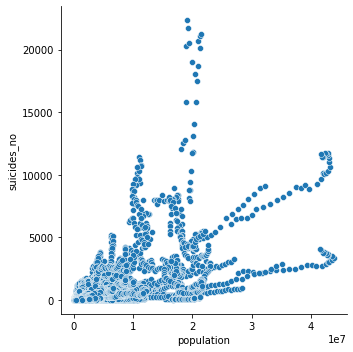

In [6]:
sb.relplot(x="population", y="suicides_no", data=df)
